<a href="https://colab.research.google.com/github/AadityaAdh/ML_Locally_weighted_regression/blob/main/locally_weighted_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
dataset=np.array(([1,1],[2,3],[3,5],[4,3],[5,1],[6,1],[7,3],[8,5]),dtype=float)
features=dataset[:,:1]
target=dataset[:,1:]
print(features)
print(target)


[[1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]]
[[1.]
 [3.]
 [5.]
 [3.]
 [1.]
 [1.]
 [3.]
 [5.]]


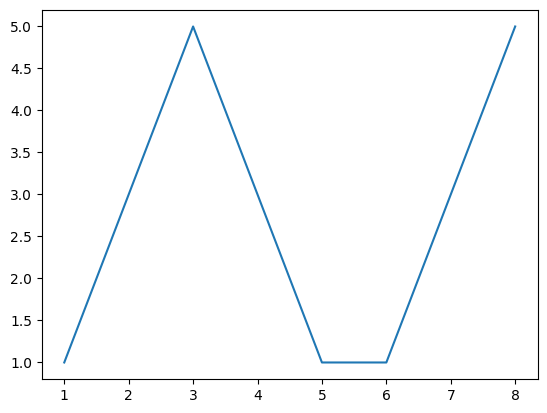

In [ ]:
plt.plot(features,target)
plt.show()

In [ ]:
x=7
def hypothesis(theta0,theta1,x1):
  h=theta0+theta1*x1
  return h

In [ ]:
myweight=np.empty_like(features)
def weight(x,features,myweight):
  for index in range(len(features)):
    diff=(x-features[index])**2
    tau = 1.65
    aa=math.exp(-diff / (2 * tau**2))
    myweight[index] = aa

  return myweight

myweight=weight(x,features,myweight)
print(myweight)



[[0.00134472]
 [0.01013898]
 [0.05294638]
 [0.1914952 ]
 [0.47968823]
 [0.8322231 ]
 [1.        ]
 [0.8322231 ]]


In [ ]:
def update_theta(theta0,theta1,features_train,targets_train):
  sum_pd0=0
  for index in range(len(features_train)):
    diffn=hypothesis(theta0,theta1,features_train[index])-targets_train[index]
    sum_pd0=sum_pd0+diffn*myweight[index]
  #for theta1
  sum_pd1=0
  for index in range(len(features_train)):
    diffn=hypothesis(theta0,theta1,features_train[index])-targets_train[index]
    sum_pd1=sum_pd1+myweight[index]*(diffn*features_train[index])
  theta0=theta0-0.00001*sum_pd0
  theta1=theta1-0.00001*sum_pd1
  return theta0,theta1

In [ ]:
theta0 = 0
theta1 = 0
prev_theta0 = 999
prev_theta1 = 999
count = 0
tolerance = 1e-6

while count <= 100000:
    prev_theta0 = theta0
    prev_theta1 = theta1
    theta0, theta1 = update_theta(theta0, theta1, features, target)
    delta_theta0 = abs(theta0 - prev_theta0)
    delta_theta1 = abs(theta1 - prev_theta1)
    if delta_theta0 < tolerance and delta_theta1 < tolerance:
        break
    count += 1

print("Converged after", count, "iterations")
print("Final theta0:", theta0)
print("Final theta1:", theta1)


Converged after 100001 iterations
Final theta0: [-0.22433868]
Final theta1: [0.47179114]
